# Exploring specifically the Input Text Data for Training and Verification

In [52]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)

# Loading Data

In [2]:
path_file = os.path.join(os.path.dirname(os.getcwd()), "data", "raw", "CRS2018data.txt")

In [3]:
df = pd.read_csv(path_file, sep='|', encoding='ISO-8859-1')

/Users/pedrobaiz/src/oecd_financial_flows/venv_oecdflows/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,51,53,56,57,77,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df.head()

,Year,DonorCode,DonorName,AgencyCode,AgencyName,CrsID,ProjectNumber,InitialReport,RecipientCode,RecipientName,RegionCode,RegionName,IncomegroupCode,IncomegroupName,FlowCode,FlowName,Bi_Multi,Category,Finance_t,Aid_t,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,USD_AmountTied,USD_AmountUntied_Defl,USD_AmountPartialTied_Defl,USD_Amounttied_Defl,USD_IRTC,USD_Expert_Commitment,USD_Expert_Extended,USD_Export_Credit,CurrencyCode,Commitment_National,Disbursement_National,GrantEquiv,USD_GrantEquiv,ShortDescription,ProjectTitle,PurposeCode,PurposeName,SectorCode,SectorName,ChannelCode,ChannelName,ChannelReportedName,ParentChannelCode,Geography,ExpectedStartDate,CompletionDate,LongDescription,SDGfocus,Gender,Environment,PDGG,Trade,RMNCH,DRR,Nutrition,Disability,FTC,PBA,InvestmentProject,AssocFinance,Biodiversity,ClimateMitigation,ClimateAdaptation,Desertification,CommitmentDate,TypeRepayment,NumberRepayment,Interest1,Interest2,Repaydate1,Repaydate2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,BudgetIdent,CapitalExpend,SDGfocusArray,SDGfocusNumber,EMPTY_SDG,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17
0,2018,3.0,Denmark,3.0,Investment Fund For Developing Countries,NaN,NaN,NaN,645.0,India,10009.0,South & Central Asia,10018.0,LMICs,14.0,Other Official Flows (non Export Credit),1.0,21.0,421.0,NaN,0.0000,0.00000,0.310842,0.0000,0.00000,0.310842,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,302.0,0.0000,0.00000,NaN,NaN,Semi-aggregates,NaN,321.0,III.2.a. Industry,321.0,III.2.a. Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semi-aggregates,EMPTY_SDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197405,NaN,NaN,NaN,NaN,NaN,[EMPTY_SDG],1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2018,3.0,Denmark,3.0,Investment Fund For Developing Countries,NaN,NaN,NaN,730.0,China (People's Republic of),10008.0,Far East Asia,10019.0,UMICs,14.0,Other Official Flows (non Export Credit),1.0,21.0,421.0,NaN,0.0000,2.58111,1.487220,0.0000,2.58111,1.487220,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,302.0,0.0000,2.58111,NaN,NaN,Semi-aggregates,NaN,321.0,III.2.a. Industry,321.0,III.2.a. Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semi-aggregates,EMPTY_SDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080917,NaN,NaN,NaN,NaN,NaN,[EMPTY_SDG],1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2018,3.0,Denmark,3.0,Investment Fund For Developing Countries,NaN,NaN,NaN,85.0,Ukraine,10010.0,Europe,10018.0,LMICs,14.0,Other Official Flows (non Export Credit),1.0,21.0,431.0,NaN,11.5074,0.00000,0.459937,11.5074,0.00000,0.459937,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,302.0,11.5074,0.00000,NaN,NaN,Semi-aggregates,NaN,232.0,"II.3.b. Energy generation, renewable sources",232.0,"II.3.b. Energy generation, renewable sources",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semi-aggregates,EMPTY_SDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176108,NaN,NaN,NaN,NaN,NaN,[EMPTY_SDG],1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2018,3.0,Denmark,3.0,Investment Fund For Developing Countries,NaN,NaN,NaN,142.0,Egypt,10002.0,North of Sahara,10018.0,LMICs,14.0,Other Official Flows (non Export Credit),1.0,21.0,510.0,NaN,0.0000,0.00000,4.371040,0.0000,0.00000,4.371040,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,302.0,0.0000,0.00000,NaN,NaN,Semi-aggregates,NaN,321.0,III.2.a. Industry,321.0,III.2.a. Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semi-aggregates,EMPTY_SDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.463887,NaN,NaN,NaN,NaN,NaN,[EMPT

In [50]:
for item in df.columns:
    print(item)

Year
DonorCode
DonorName
AgencyCode
AgencyName
CrsID
ProjectNumber
InitialReport
RecipientCode
RecipientName
RegionCode
RegionName
IncomegroupCode
IncomegroupName
FlowCode
FlowName
Bi_Multi
Category
Finance_t
Aid_t
USD_Commitment
USD_Disbursement
USD_Received
USD_Commitment_Defl
USD_Disbursement_Defl
USD_Received_Defl
USD_Adjustment
USD_Adjustment_Defl
USD_AmountUntied
USD_AmountPartialTied
USD_AmountTied
USD_AmountUntied_Defl
USD_AmountPartialTied_Defl
USD_Amounttied_Defl
USD_IRTC
USD_Expert_Commitment
USD_Expert_Extended
USD_Export_Credit
CurrencyCode
Commitment_National
Disbursement_National
GrantEquiv
USD_GrantEquiv
ShortDescription
ProjectTitle
PurposeCode
PurposeName
SectorCode
SectorName
ChannelCode
ChannelName
ChannelReportedName
ParentChannelCode
Geography
ExpectedStartDate
CompletionDate
LongDescription
SDGfocus
Gender
Environment
PDGG
Trade
RMNCH
DRR
Nutrition
Disability
FTC
PBA
InvestmentProject
AssocFinance
Biodiversity
ClimateMitigation
ClimateAdaptation
Desertification
C

# Checking SDGs

In [4]:
df['SDGfocus'] = df['SDGfocus'].replace(np.nan, 'EMPTY_SDG').apply(str)

In [5]:
df['SDGfocusArray'] = df['SDGfocus'].apply(lambda x: [item.split('.')[0] for item in x.split(';')])

In [6]:
df['SDGfocusNumber'] = df['SDGfocusArray'].apply(lambda x: len(x))

# Finding Specific Assignment of SDG per Project

In [8]:
df['EMPTY_SDG'] = df['SDGfocusArray'].apply(lambda x: True if 'EMPTY_SDG' in x else False)
df['SDG1'] = df['SDGfocusArray'].apply(lambda x: True if '1' in x else False)
df['SDG2'] = df['SDGfocusArray'].apply(lambda x: True if '2' in x else False)
df['SDG3'] = df['SDGfocusArray'].apply(lambda x: True if '3' in x else False)
df['SDG4'] = df['SDGfocusArray'].apply(lambda x: True if '4' in x else False)
df['SDG5'] = df['SDGfocusArray'].apply(lambda x: True if '5' in x else False)
df['SDG6'] = df['SDGfocusArray'].apply(lambda x: True if '6' in x else False)
df['SDG7'] = df['SDGfocusArray'].apply(lambda x: True if '7' in x else False)
df['SDG8'] = df['SDGfocusArray'].apply(lambda x: True if '8' in x else False)
df['SDG9'] = df['SDGfocusArray'].apply(lambda x: True if '9' in x else False)
df['SDG10'] = df['SDGfocusArray'].apply(lambda x: True if '10' in x else False)
df['SDG11'] = df['SDGfocusArray'].apply(lambda x: True if '11' in x else False)
df['SDG12'] = df['SDGfocusArray'].apply(lambda x: True if '12' in x else False)
df['SDG13'] = df['SDGfocusArray'].apply(lambda x: True if '13' in x else False)
df['SDG14'] = df['SDGfocusArray'].apply(lambda x: True if '14' in x else False)
df['SDG15'] = df['SDGfocusArray'].apply(lambda x: True if '15' in x else False)
df['SDG16'] = df['SDGfocusArray'].apply(lambda x: True if '16' in x else False)
df['SDG17'] = df['SDGfocusArray'].apply(lambda x: True if '17' in x else False)

In [9]:
# https://stackoverflow.com/questions/33388867/creating-circular-flow-charts-circos
# https://vega.github.io/vega/examples/edge-bundling/

In [10]:
columns_sdg = ['EMPTY_SDG', 'SDG1', 'SDG2', 'SDG3', 'SDG4', 'SDG5', 'SDG6', 'SDG7', 'SDG8', 'SDG9', 
               'SDG10', 'SDG11', 'SDG12', 'SDG13', 'SDG14', 'SDG15', 'SDG16', 'SDG17']

In [11]:
list_sdgs = df[columns_sdg].sum()
list_sdgs_per = df[columns_sdg].sum()/len(df)*100

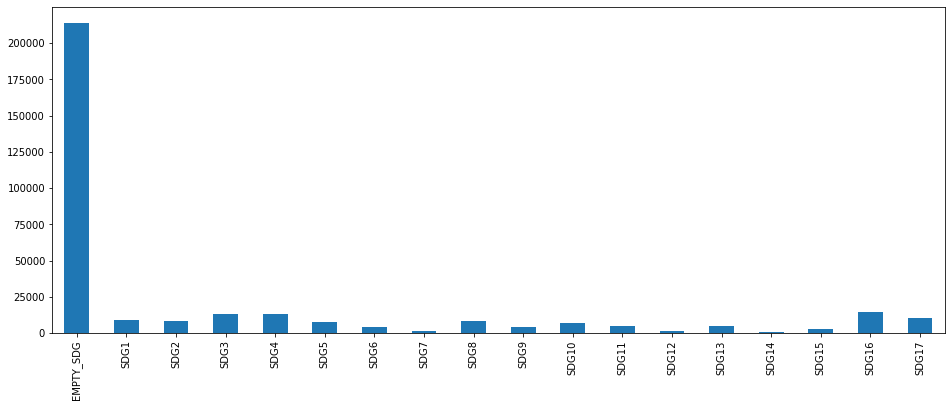

In [12]:
list_sdgs.plot.bar(figsize=(16, 6))

# Working Only with SDG Data

In [14]:
df_sdg = df[ df['EMPTY_SDG'] == False ]

In [15]:
len(df_sdg)

73097

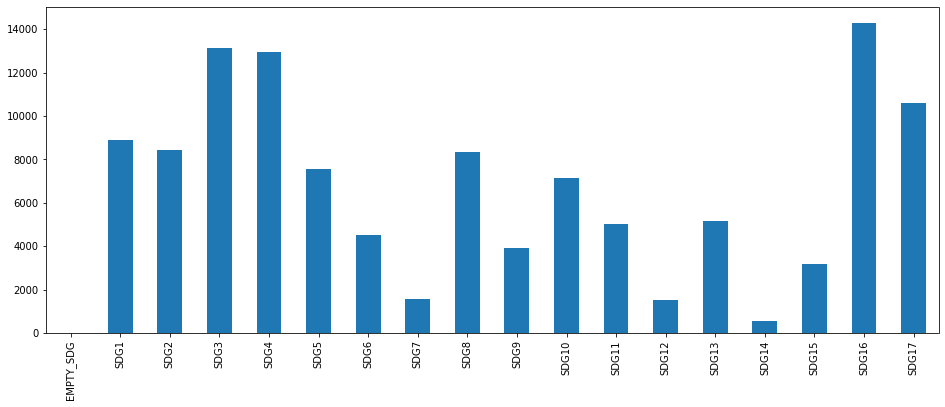

In [18]:
list_sdgs = df_sdg[columns_sdg].sum()
list_sdgs.plot.bar(figsize=(16, 6))

# Aid (MONEY) per SDG - NEED TO CHECK

In [33]:
usd_dict = {}
for sdg in columns_sdg:
    if sdg != 'EMPTY_SDG':
        df_only = df_sdg[ df_sdg[sdg] == True]
        usd_dict[sdg] = df_only['USD_Commitment'].sum()

In [35]:
usd_series = pd.DataFrame.from_dict(usd_dict, orient='index')

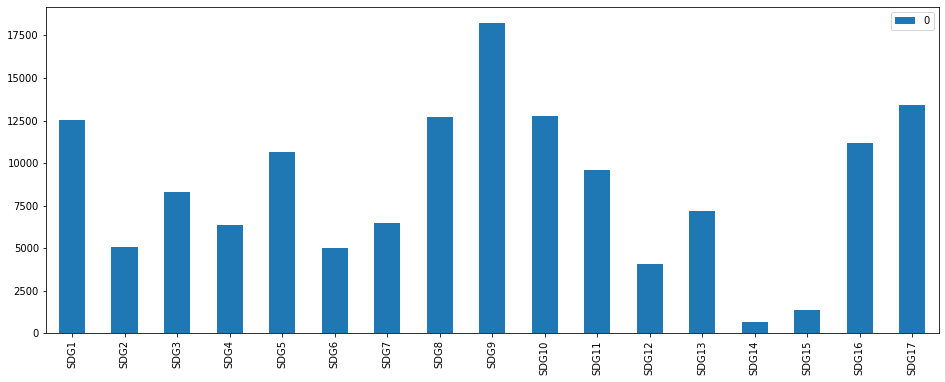

In [36]:
usd_series.plot.bar(figsize=(16, 6))

In [37]:
usd_series

,0
SDG1,12516.477092
SDG2,5084.260765
SDG3,8329.717596
SDG4,6368.487575
SDG5,10622.521753
SDG6,5010.279477
SDG7,6505.452242
SDG8,12678.086831
SDG9,18247.587971
SDG10,12777.463138


# TOP Donors

In [24]:
for sdg in columns_sdg:
    if sdg != 'EMPTY_SDG':
        df_only = df_sdg[ df_sdg[sdg] == True]
        print('####### TOP DONORS FOR:', sdg)
        print(df_only.groupby(['DonorName']).count()['Year'].sort_values(ascending=False).head())

####### TOP DONORS FOR: SDG1
DonorName
Switzerland    2104
Canada         1118
France          995
Australia       703
UNDP            498
Name: Year, dtype: int64
####### TOP DONORS FOR: SDG2
DonorName
Switzerland    2406
Canada         1330
Spain           699
UNICEF          520
Australia       487
Name: Year, dtype: int64
####### TOP DONORS FOR: SDG3
DonorName
Canada                             5164
Switzerland                        1552
UNICEF                             1230
Bill & Melinda Gates Foundation    1178
Spain                               621
Name: Year, dtype: int64
####### TOP DONORS FOR: SDG4
DonorName
Spain          2480
Switzerland    1588
UNICEF         1368
France         1313
Canada         1043
Name: Year, dtype: int64
####### TOP DONORS FOR: SDG5
DonorName
Canada                          1662
Switzerland                     1177
BBVA Microfinance Foundation     861
Spain                            769
Australia                        512
Name: Year, dtype: i

# Bill & Melinda Gates

In [45]:
bill_gates = df_sdg[ df_sdg['DonorName'].str.contains('Gates') ]

In [47]:
bill_gates.head()

,Year,DonorCode,DonorName,AgencyCode,AgencyName,CrsID,ProjectNumber,InitialReport,RecipientCode,RecipientName,RegionCode,RegionName,IncomegroupCode,IncomegroupName,FlowCode,FlowName,Bi_Multi,Category,Finance_t,Aid_t,USD_Commitment,USD_Disbursement,USD_Received,USD_Commitment_Defl,USD_Disbursement_Defl,USD_Received_Defl,USD_Adjustment,USD_Adjustment_Defl,USD_AmountUntied,USD_AmountPartialTied,USD_AmountTied,USD_AmountUntied_Defl,USD_AmountPartialTied_Defl,USD_Amounttied_Defl,USD_IRTC,USD_Expert_Commitment,USD_Expert_Extended,USD_Export_Credit,CurrencyCode,Commitment_National,Disbursement_National,GrantEquiv,USD_GrantEquiv,ShortDescription,ProjectTitle,PurposeCode,PurposeName,SectorCode,SectorName,ChannelCode,ChannelName,ChannelReportedName,ParentChannelCode,Geography,ExpectedStartDate,CompletionDate,LongDescription,SDGfocus,Gender,Environment,PDGG,Trade,RMNCH,DRR,Nutrition,Disability,FTC,PBA,InvestmentProject,AssocFinance,Biodiversity,ClimateMitigation,ClimateAdaptation,Desertification,CommitmentDate,TypeRepayment,NumberRepayment,Interest1,Interest2,Repaydate1,Repaydate2,USD_Interest,USD_Outstanding,USD_Arrears_Principal,USD_Arrears_Interest,BudgetIdent,CapitalExpend,SDGfocusArray,SDGfocusNumber,EMPTY_SDG,SDG1,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,SDG16,SDG17,Test
273929,2018,1601.0,Bill & Melinda Gates Foundation,1.0,Bill & Melinda Gates Foundation,2018010788_03,OPP1202399,1.0,285.0,Uganda,10003.0,South of Sahara,10016.0,LDCs,30.0,Private Development Finance,6.0,30.0,110.0,C01,0.125000,0.062500,0.0,0.125000,0.062500,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,0.125000,0.062500,NaN,NaN,CHINA-AFRICA BUSINESS COUNCIL,Digital health solutions for UHC in sub-Sahara...,12220.0,Basic health care,122.0,I.2.b. Basic Health,23000.0,Developing country-based NGO,China-Africa Business Council,23000.0,Uganda,2018-10-23,2019-10-31,to improve UHC delivery and health outcomes in...,3;17,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2018-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12220.0,NaN,"[3, 17]",2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
273930,2018,1601.0,Bill & Melinda Gates Foundation,1.0,Bill & Melinda Gates Foundation,2018010833_14,OPP1191980,1.0,289.0,"South of Sahara, regional",10003.0,South of Sahara,10024.0,Part I unallocated by income,30.0,Private Development Finance,6.0,30.0,110.0,C01,1.050000,0.210000,0.0,1.050000,0.210000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,1.050000,0.210000,NaN,NaN,STITCHTING IDH SUSTAINABLE TRADE INITIATIVE,SDM Knowledge and Innovation Hub,31120.0,Agricultural development,311.0,III.1.a. Agriculture,22000.0,Donor country-based NGO,Stitchting IDH Sustainable Trade Initiative,22000.0,"AFRICA, SOUTH OF SAHARA",2018-11-28,2023-10-31,"to develop, test and scale inclusive and susta...",8;2;17;1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2018-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31120.0,NaN,"[8, 2, 17, 1]",4,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
274004,2018,1601.0,Bill & Melinda Gates Foundation,1.0,Bill & Melinda Gates Foundation,2018010888_04,OPP1175059,1.0,243.0,Guinea,10003.0,South of Sahara,10016.0,LDCs,30.0,Private Development Finance,6.0,30.0,110.0,C01,0.135534,0.068301,0.0,0.135534,0.068301,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,0.135534,0.068301,NaN,NaN,KAIZEN INSTITUTE CONSULTING GROUP AFAE LIMITED,Kaizen (CI) related support to SOLVE countries...,13030.0,Family planning,130.0,I.3. Population Policies/Programmes & Reproduc...,51000.0,"University, college or other teaching institut...",KAIZEN INSTITUTE CONSULTING GROUP AFAE LIMITED,51000.0,Guinea,2018-10-22,2020-01-31,to improve availability of family planning and...,5;3;17,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2018-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

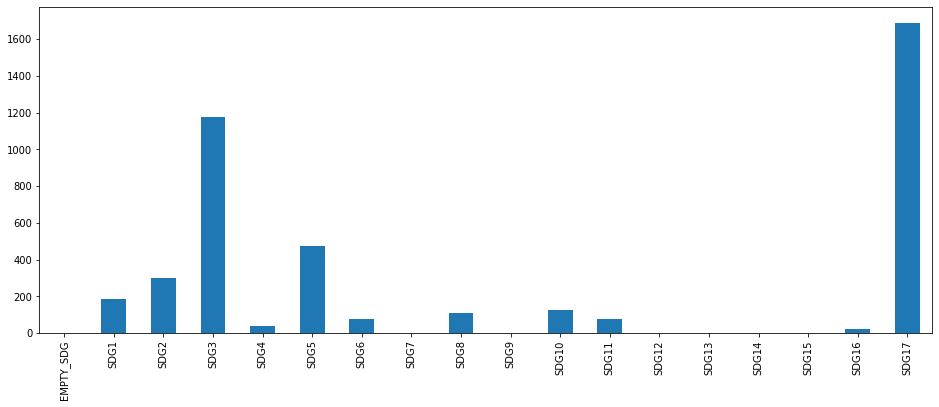

In [48]:
bill_gates[columns_sdg].sum().plot.bar(figsize=(16, 6))

# Per Region

In [78]:
region_list = []
for sdg in columns_sdg:
    if sdg != 'EMPTY_SDG':
        df_only = df_sdg[ df_sdg[sdg] == True]
        # Get totals for SDG
        region_total = df_only.groupby(['RegionName'])['USD_Commitment'].sum()
        # Initialise
        row = {"SDG": sdg}
        for region in region_total.iteritems():
            row[region[0]] = region[1]
        # Append to Final List
        region_list.append(row)

In [80]:
region_list_df = pd.DataFrame.from_dict(region_list)

In [82]:
region_list_df.head()

,SDG,Africa,America,Asia,Caribbean & Central America,Europe,Far East Asia,Middle East,North of Sahara,Oceania,Regional and Unspecified,South & Central Asia,South America,South of Sahara
0,SDG1,208.973701,260.119778,105.787734,1176.331125,506.248821,623.455796,1457.163111,565.862442,81.768054,2399.378424,951.828870,1792.035462,2387.523773
1,SDG2,70.829661,104.989412,17.297908,192.083108,10.608675,335.536514,636.625328,83.266842,44.428396,765.173411,871.572177,544.210644,1407.638690
2,SDG3,166.717723,9.008907,49.361976,482.336971,210.933450,244.443519,691.295166,292.605423,143.320403,2395.292275,999.306808,1157.139594,1487.955381
3,SDG4,58.204337,18.528195,2.626073,573.799482,1039.058947,234.088967,556.107424,416.439395,199.404824,818.472811,535.726321,1295.176615,620.854183
4,SDG5,42.620243,198.227888,10.368973,2833.937871,176.595894,132.086371,130.373389,43.373285,136.037969,1131.493744,315.801829,4708.466002,763.138294


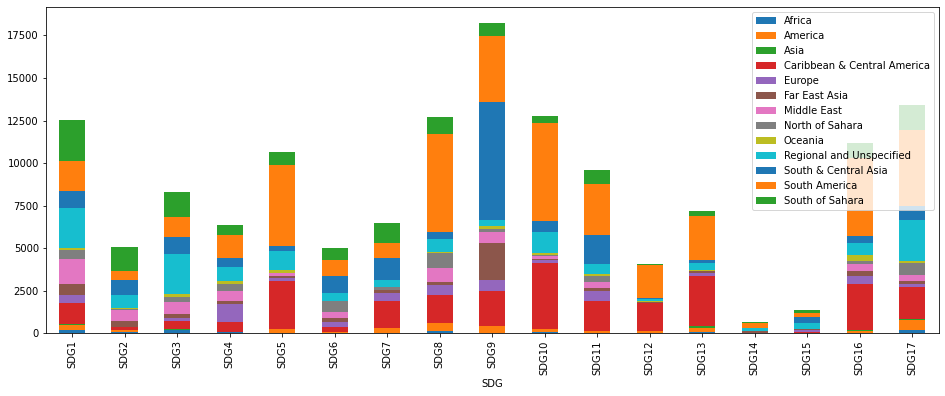

In [84]:
region_list_df.set_index('SDG').plot.bar(stacked=True, figsize=(16, 6))

In [86]:
region_list_df.head()

,SDG,Africa,America,Asia,Caribbean & Central America,Europe,Far East Asia,Middle East,North of Sahara,Oceania,Regional and Unspecified,South & Central Asia,South America,South of Sahara
0,SDG1,208.973701,260.119778,105.787734,1176.331125,506.248821,623.455796,1457.163111,565.862442,81.768054,2399.378424,951.828870,1792.035462,2387.523773
1,SDG2,70.829661,104.989412,17.297908,192.083108,10.608675,335.536514,636.625328,83.266842,44.428396,765.173411,871.572177,544.210644,1407.638690
2,SDG3,166.717723,9.008907,49.361976,482.336971,210.933450,244.443519,691.295166,292.605423,143.320403,2395.292275,999.306808,1157.139594,1487.955381
3,SDG4,58.204337,18.528195,2.626073,573.799482,1039.058947,234.088967,556.107424,416.439395,199.404824,818.472811,535.726321,1295.176615,620.854183
4,SDG5,42.620243,198.227888,10.368973,2833.937871,176.595894,132.086371,130.373389,43.373285,136.037969,1131.493744,315.801829,4708.466002,763.138294


In [85]:
# https://github.com/fengwangPhysics/matplotlib-chord-diagram
# https://stackoverflow.com/questions/33388867/creating-circular-flow-charts-circos